In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.patches as patches

In [5]:
import argparse
import os
import sys
import torchvision
import torch
from torch.serialization import default_restore_location
from torch.distributions import Poisson
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

sys.path.append('../')
import data
import models
import utils

/Users/liukangning/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/liukangning/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowExxb
  Referenced from: <8080486D-E510-3000-AA6A-F3AD49ACC172> /Users/liukangning/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <598DDE6B-5A2E-3301-B9C5-9034AEC256A9> /Users/liukangning/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


In [2]:
frame_num = 0
base_path = f'/scratch/sm7582/prince/sm7582/GithubRepos/semi-supervised-denoising/images/grayscale/nanoparticle/{frame_num}'

In [2]:
def load_model(checkpoint_path):
    state_dict = torch.load( checkpoint_path, map_location=lambda s,
                                l: default_restore_location(s,"cpu"))
    
    args = argparse.Namespace(
        **{**vars(state_dict["args"])})
    model = models.build_model(args).to(device)
    model.load_state_dict(state_dict["model"][0])
    model.eval()
    return model

In [3]:
checkpoint_path = '../checkpoints/unet-128-small.pt'

In [6]:
USE_CUDA = False
device = torch.device("cuda") if (
        torch.cuda.is_available() and USE_CUDA) else torch.device("cpu")

In [7]:
net = load_model(checkpoint_path).to(device)
_ = net.eval()

In [9]:
x = torch.from_numpy(np.load('../images/real_data/00000.npy'))

In [10]:
noisy = x.to(device).unsqueeze(0).requires_grad_(True)
with torch.no_grad():
    denoised = net(noisy)

In [11]:
# noisy = np.load(os.path.join(base_path, 'noisy.npy'))
# clean = np.load(os.path.join(base_path, 'clean.npy'))
# blindspot_init = np.load(glob.glob(os.path.join(base_path,'mse/blind-spot-net-bn-bn_onlyscaling-*', 'intermediate_outputs/denoised.npy'))[0])[0]
# blindspot_gaintuned =  np.load(glob.glob(os.path.join(base_path,'mse/blind-spot-net-bn-bn_onlyscaling-*', 'intermediate_outputs/denoised.npy'))[0])[-1]
# self2self = np.load(os.path.join(base_path, 'self2self', 'denoised.npy'))[-1]
# # self2self = np.load('/scratch/sm7582/prince/sm7582/GithubRepos/nanoparticle_denoising/notebooks/iclr/real_denoised/self2self.npy')

In [21]:
# images = [noisy, clean, self2self, blindspot_init, blindspot_gaintuned]
# labels = ['noisy', 'ref', 'self2self', 'simulated', 'gaintuning']

images = [noisy.detach().data.numpy()[0,0], denoised.detach().data.numpy()[0,0]]
labels = ['noisy', 'restricted']

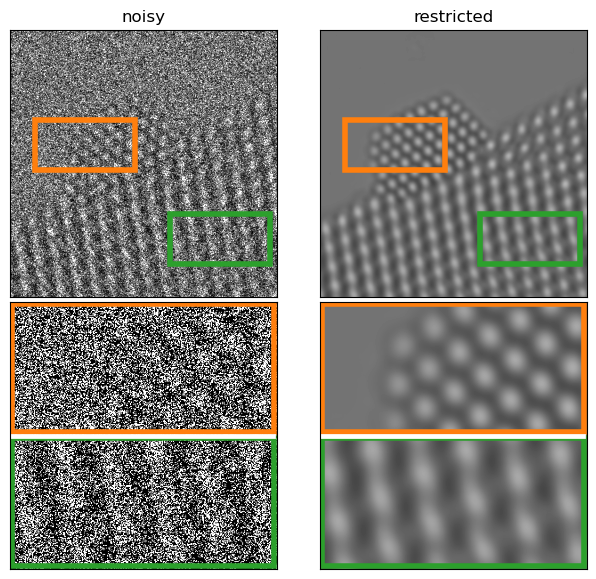

In [ ]:
global_x_start = 200
global_x_end = 1000

global_y_start = 200
global_y_end = 1000


boxes = [[275, 470, 300, 150,  'C1'], [680, 750, 300, 150, 'C2'] ] #, [100, 100, 100, 'C3']]

for j, (px, py, wx, wy, color) in enumerate(boxes):
    boxes[j] = [px-global_x_start, py-global_y_start, wx, wy, color]

linewidth = 4
vmax=1.0
vmin=0.0
figsize = (4*len(images), 7)

fig, axes_all = plt.subplots(nrows=2, ncols=len(images), figsize=figsize)
for i, (img, lab) in enumerate(zip(images, labels)):
    
    axes = axes_all[:, i]
    
    img = img[global_y_start: global_y_end, global_x_start:global_x_end]
    axes[0].imshow(img, cmap='gray', vmax=vmax, vmin=vmin)
    img_concat = []
    for j, (px, py, wx, wy, color) in enumerate(boxes):
        axes[0].add_patch(patches.Rectangle((px, py), wx, wy, linewidth=linewidth, edgecolor=color, facecolor="none"))
        img_concat.append(img[py:py+wy, px:px+wx])
    img_concat = np.vstack(img_concat)
    axes[1].imshow(img_concat, cmap='gray', vmax=1.0, vmin=0.0)
    tot_x = 0
    tot_y = 0
    for j, (px, py, wx, wy, color) in enumerate(boxes):
        axes[1].add_patch(patches.Rectangle((tot_x+2, tot_y+2), wx-linewidth-2, wy-linewidth-2, linewidth=linewidth, edgecolor=color, facecolor="none"))
#         tot_x += wx
        tot_y += wy
    
    axes[1].add_patch(patches.Rectangle((tot_x, img_concat.shape[0]//2-1), wx-linewidth, 2, linewidth=2, edgecolor='white', facecolor="none"))
        
        

    axes[0].set_title(lab)
    
    for ax in axes.flatten():
            ax.set_xticks([])
            ax.set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0.02)
    
#     plt.savefig(f'{frame_num}/{lab}.pdf', bbox_inches='tight', pad_inches = 0)
    
plt.show()

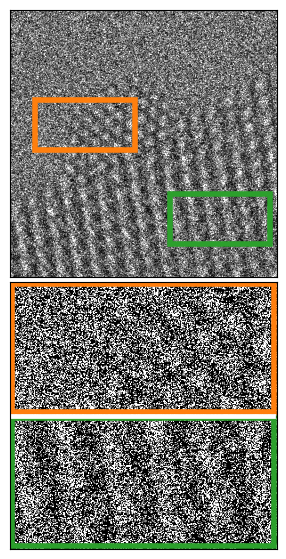

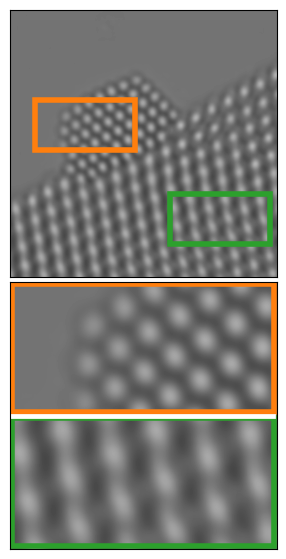

In [24]:
# boxes = [[325, 470, 300, 150,  'C1'], [800, 750, 300, 150, 'C2'] ] #, [100, 100, 100, 'C3']]
# linewidth = 4
# vmax=1.0
# vmin=0.0
figsize = (4, 7)
frame_num='1212'

os.makedirs(f'{frame_num}', exist_ok=True)
for i, (img, lab) in enumerate(zip(images, labels)):
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
    
    img = img[global_y_start: global_y_end, global_x_start:global_x_end]
    
    axes[0].imshow(img, cmap='gray', vmax=vmax, vmin=vmin)
    img_concat = []
    for j, (px, py, wx, wy, color) in enumerate(boxes):
        axes[0].add_patch(patches.Rectangle((px, py), wx, wy, linewidth=linewidth, edgecolor=color, facecolor="none"))
        img_concat.append(img[py:py+wy, px:px+wx])
    img_concat = np.vstack(img_concat)
    axes[1].imshow(img_concat, cmap='gray', vmax=1.0, vmin=0.0)
    tot_x = 0
    tot_y = 0
    for j, (px, py, wx, wy, color) in enumerate(boxes):
        axes[1].add_patch(patches.Rectangle((tot_x+2, tot_y+2), wx-linewidth-2, wy-linewidth-2, linewidth=linewidth, edgecolor=color, facecolor="none"))
#         tot_x += wx
        tot_y += wy
        
    axes[1].add_patch(patches.Rectangle((tot_x, img_concat.shape[0]//2-1), wx-linewidth, 2, linewidth=2, edgecolor='white', facecolor="none"))

#     axes[0].set_title(lab)
    
    for ax in axes.flatten():
            ax.set_xticks([])
            ax.set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0.02)
    
    plt.savefig(f'{frame_num}/{lab}.pdf', bbox_inches='tight', pad_inches = 0)
    
    plt.show()